<a href="https://colab.research.google.com/github/carolcomputes/NGG6050/blob/main/0911HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

In [5]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')


707 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.7070


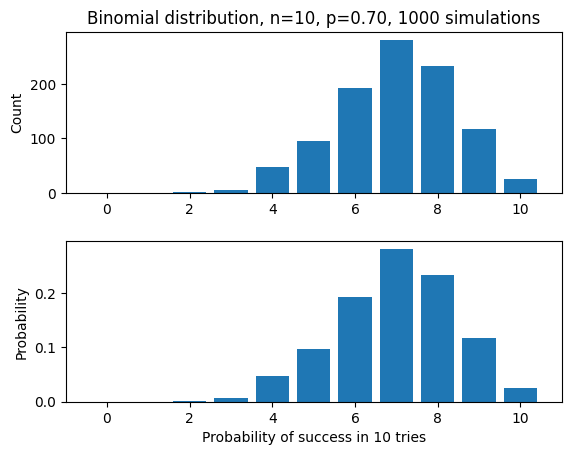

In [6]:

# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, the the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

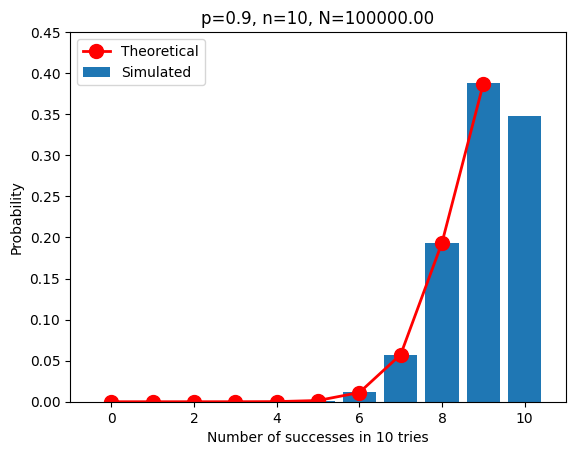

In [7]:
# Now let's make a fun animation showing different values of p and N.
#   Note that, of course, the more picks you make of the random variable
#   (higher N), the more closely the outcomes (the "samples") match the true
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)

        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)


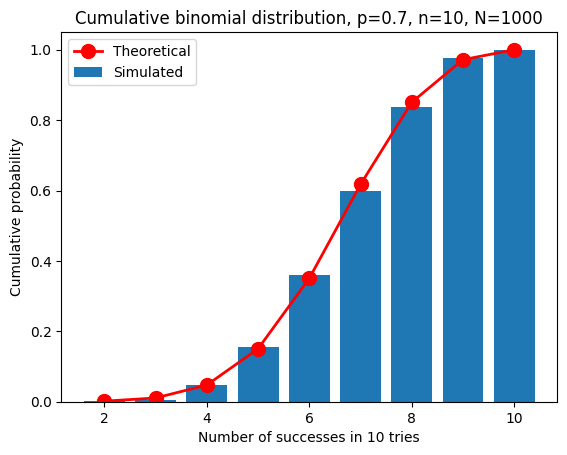

In [10]:

# The cumulative distribution function is just the proability of obtaining an
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so
#   it is a probability function and not just a histogram -- note that the final
#   value in the cdf should equal 1 because every value should be equal to or
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

Exercise 1

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

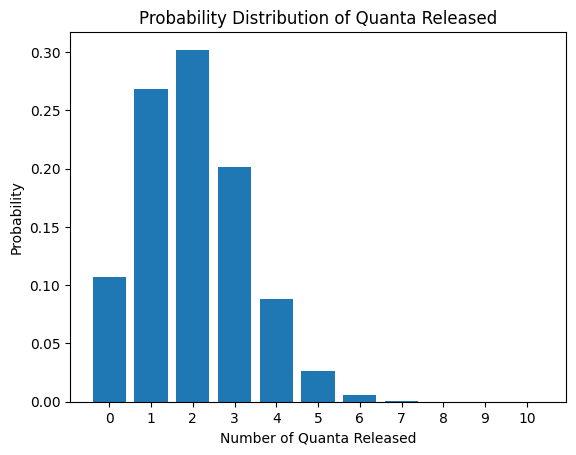

In [13]:


p = 0.2
n = 10
quanta_range = range(11)  # Numbers of quanta from 0 to 10

# Calculate probabilities for each number of quanta being released
probabilities = [comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in quanta_range]

# Create a bar plot
plt.bar(quanta_range, probabilities)
plt.xlabel('Number of Quanta Released')
plt.ylabel('Probability')
plt.title('Probability Distribution of Quanta Released')
plt.xticks(quanta_range)
plt.show()



Exercise 2Exercise 2

Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.

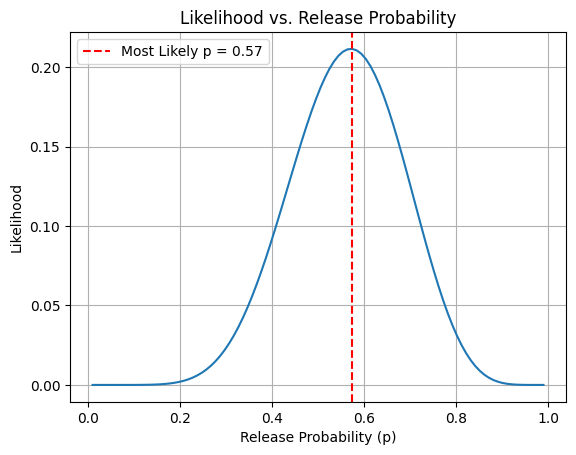

The most likely release probability given the measurement is p = 0.57


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from math import comb

# Observed number of quanta released
k_observed = 8

# Number of quanta available for release
n = 14

# Range of release probabilities to test
release_probabilities = np.linspace(0.01, 0.99, 100)  # Create a range of probabilities

# Calculate and store likelihoods for each release probability
likelihood_results = []

for p in release_probabilities:
    likelihood = comb(n, k_observed) * (p ** k_observed) * ((1 - p) ** (n - k_observed))
    likelihood_results.append(likelihood)

# Find the release probability with the highest likelihood
most_likely_p = release_probabilities[np.argmax(likelihood_results)]

# Create a likelihood plot
plt.plot(release_probabilities, likelihood_results)
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood vs. Release Probability')
plt.axvline(x=most_likely_p, color='r', linestyle='--', label=f'Most Likely p = {most_likely_p:.2f}')
plt.legend()
plt.grid()
plt.show()

print(f"The most likely release probability given the measurement is p = {most_likely_p:.2f}")



Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

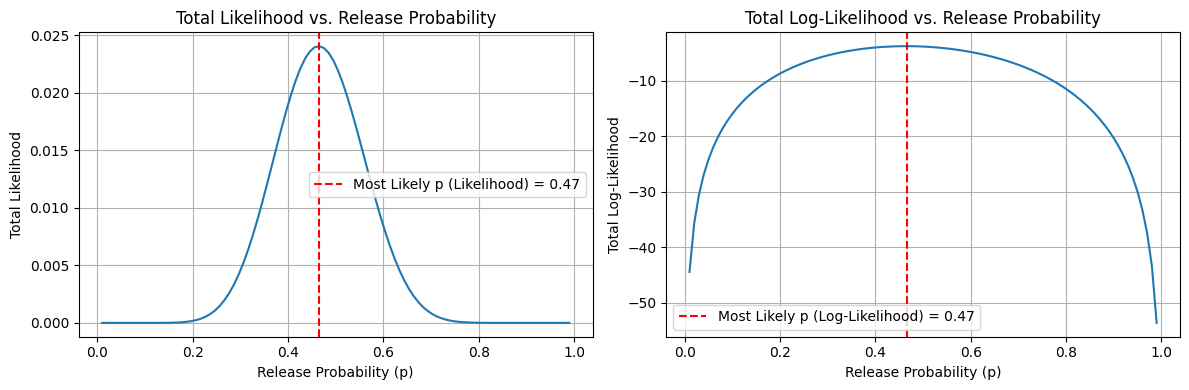

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from math import comb, log

# Observed numbers of quanta released for two measurements
k1 = 8
k2 = 5

# Number of quanta available for release
n = 14

# Range of release probabilities to test
release_probabilities = np.linspace(0.01, 0.99, 100)  # Create a range of probabilities

# Calculate likelihoods and log-likelihoods for each release probability
likelihood_results = []
log_likelihood_results = []

for p in release_probabilities:
    likelihood_1 = comb(n, k1) * (p ** k1) * ((1 - p) ** (n - k1))
    likelihood_2 = comb(n, k2) * (p ** k2) * ((1 - p) ** (n - k2))

    total_likelihood = likelihood_1 * likelihood_2
    total_log_likelihood = log(likelihood_1) + log(likelihood_2)

    likelihood_results.append(total_likelihood)
    log_likelihood_results.append(total_log_likelihood)

# Find the release probability with the highest likelihood
most_likely_p_likelihood = release_probabilities[np.argmax(likelihood_results)]
most_likely_p_log_likelihood = release_probabilities[np.argmax(log_likelihood_results)]

# Create likelihood and log-likelihood plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(release_probabilities, likelihood_results)
plt.xlabel('Release Probability (p)')
plt.ylabel('Total Likelihood')
plt.title('Total Likelihood vs. Release Probability')
plt.axvline(x=most_likely_p_likelihood, color='r', linestyle='--', label=f'Most Likely p (Likelihood) = {most_likely_p_likelihood:.2f}')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(release_probabilities, log_likelihood_results)
plt.xlabel('Release Probability (p)')
plt.ylabel('Total Log-Likelihood')
plt.title('Total Log-Likelihood vs. Release Probability')
plt.axvline(x=most_likely_p_log_likelihood, color='r', linestyle='--', label=f'Most Likely p (Log-Likelihood) = {most_likely_p_log_likelihood:.2f}')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	Count
0	0
1	0
2	3
4	10
5	19
6	26
7	16
8	16
9	5
10	5
11	0
12	0
13	0
14	0
What is the most likely value of p (which we typically refer to as
p
^
, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find
p
^
.

<ipython-input-8-a89a6bdfa022>:29: RuntimeWarning: divide by zero encountered in log
  return -np.log(likelihood)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


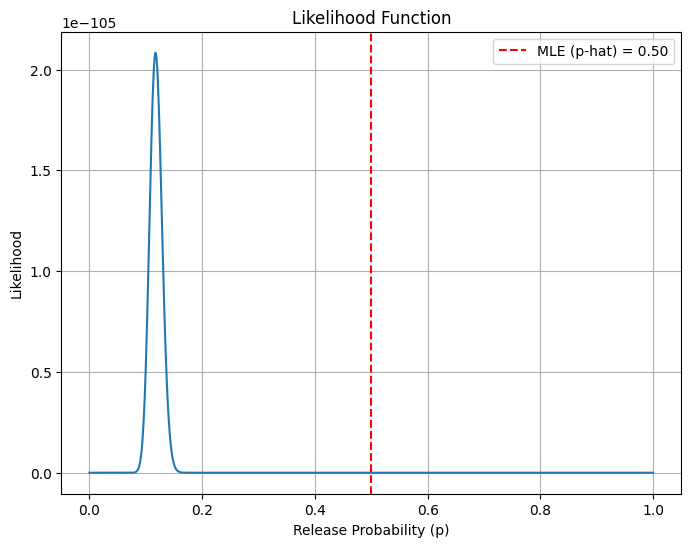

The most likely value of p-hat is approximately 0.50


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from math import comb

# Measured releases and their corresponding counts
data = {
    0: 0,
    1: 0,
    2: 3,
    4: 10,
    5: 19,
    6: 26,
    7: 16,
    8: 16,
    9: 5,
    10: 5,
    11: 0,
    12: 0,
    13: 0,
    14: 0,
}

# Define the negative log-likelihood function to minimize
def neg_log_likelihood(p):
    likelihood = 1.0
    for k, count in data.items():
        likelihood *= (comb(14, k) * (p**k) * ((1-p)**(14-k))**count)
    return -np.log(likelihood)

# Use numerical optimization to find p-hat
initial_guess = 0.5  # Initial guess for p
result = minimize(neg_log_likelihood, initial_guess, bounds=[(0, 1)])
p_hat = result.x[0]

# Plot the likelihood function
p_values = np.linspace(0, 1, 1000)
likelihood_values = [np.exp(-neg_log_likelihood(p)) for p in p_values]

plt.figure(figsize=(8, 6))
plt.plot(p_values, likelihood_values)
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')
plt.axvline(x=p_hat, color='r', linestyle='--', label=f'MLE (p-hat) = {p_hat:.2f}')
plt.legend()
plt.grid()
plt.show()

print(f"The most likely value of p-hat is approximately {p_hat:.2f}")


Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute
p
^
. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

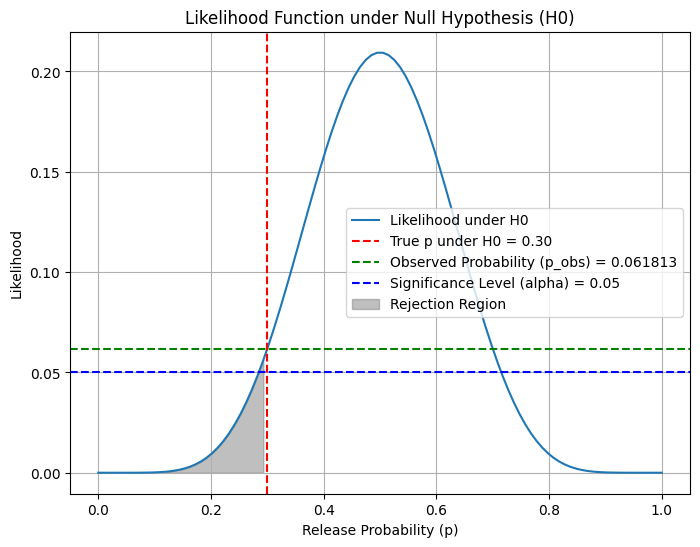

Fail to reject H0: There is no strong evidence of an effect due to temperature change.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Observed number of quanta released
k_observed = 7

# True release probability under the null hypothesis (H0)
p_null = 0.3

# Number of quanta available for release
n = 14

# Calculate the probability of observing k_observed quanta released under H0
probability_null = comb(n, k_observed) * (p_null ** k_observed) * ((1 - p_null) ** (n - k_observed))

# Significance level (alpha)
alpha = 0.05

# Create a range of possible release probabilities under H0
p_values = np.linspace(0, 1, 100)
likelihood_values = [comb(n, k_observed) * (p ** k_observed) * ((1 - p) ** (n - k_observed)) for p in p_values]

# Plot the likelihood function under H0
plt.figure(figsize=(8, 6))
plt.plot(p_values, likelihood_values, label='Likelihood under H0')
plt.axvline(x=p_null, color='r', linestyle='--', label=f'True p under H0 = {p_null:.2f}')
plt.xlabel('Release Probability (p)')
plt.ylabel('Likelihood')
plt.title('Likelihood Function under Null Hypothesis (H0)')
plt.legend()

# Mark the observed probability and significance level
plt.axhline(y=probability_null, color='g', linestyle='--', label=f'Observed Probability (p_obs) = {probability_null:.6f}')
plt.axhline(y=alpha, color='b', linestyle='--', label=f'Significance Level (alpha) = {alpha:.2f}')
plt.legend()

# Add a shaded region to represent the rejection region
plt.fill_between(p_values, 0, likelihood_values, where=(p_values <= p_null), color='gray', alpha=0.5, label='Rejection Region')
plt.legend()

# Show the plot
plt.grid()
plt.show()

# Make a decision based on the comparison of observed probability and alpha
if probability_null < alpha:
    print(f"Reject H0: There is evidence of an effect due to temperature change.")
else:
    print(f"Fail to reject H0: There is no strong evidence of an effect due to temperature change.")
